DataFrame Doesnt have any duplicate entry!!!
DataFrame Doesnt contain any NaN entry!!!


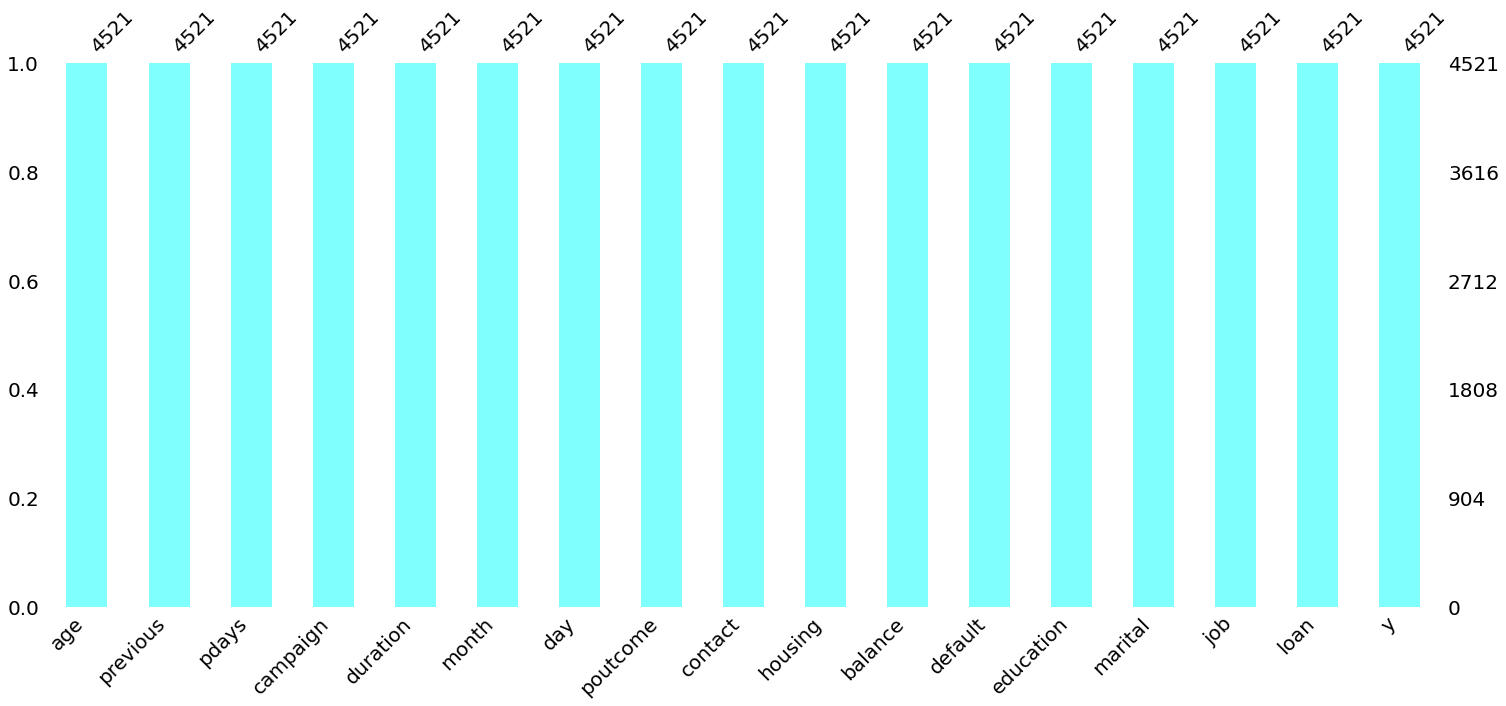

<Figure size 3600x2160 with 0 Axes>

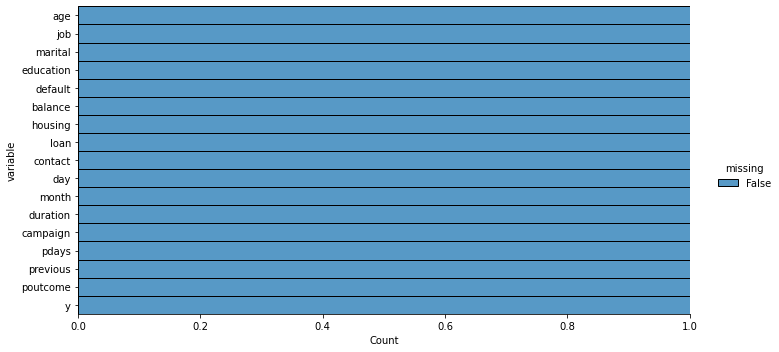

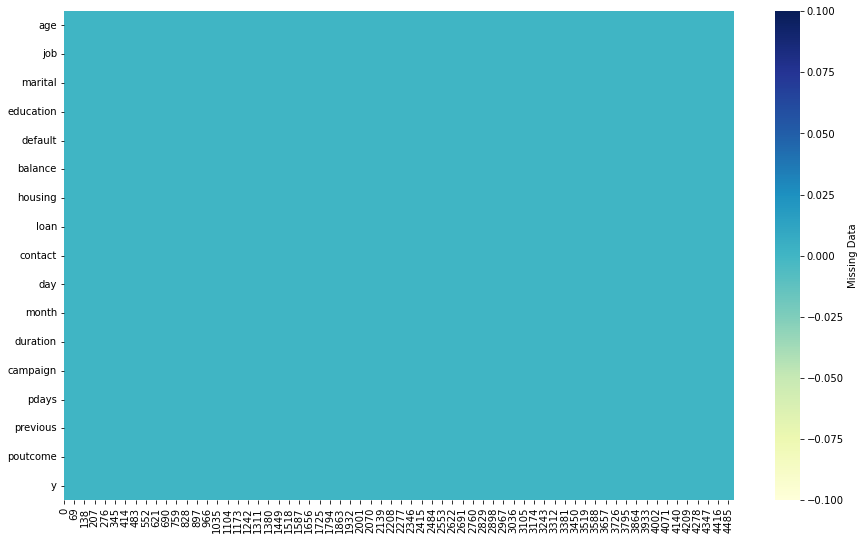

In [1]:
import pandas as pd
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt


def dupCheck(df1):
    if df1.duplicated().sum().sum():
        df1.drop_duplicates()
    else:
        print('DataFrame Doesnt have any duplicate entry!!!')
        
def checkNaN(df2): 
    if df2.isnull().sum().sum():
        df2.dropna()
    else:
        print('DataFrame Doesnt contain any NaN entry!!!')

def showDistPlotMissingValues(df3):
    plt.figure(figsize=(50,30))
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=2,
        color='Red',
        legend='True')

def showHeatMapMissingValues(df4):
    # Visualization of missing values through matplotlib.pyplot!!!
    plt.figure(figsize=(15,9))
    sns.heatmap(df.isna().transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# Read csv file here.
df = pd.read_csv('bank.csv')

dupCheck(df)
checkNaN(df)
msno.bar(df, fontsize=20, sort='ascending', log=False, filter='Top', color=(0.5, 1, 1))
showDistPlotMissingValues(df)
showHeatMapMissingValues(df)


Not Subscribed Mean:  1403.21175
Subscribed Mean:  1571.9558541266795


C:\Users\hgupt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


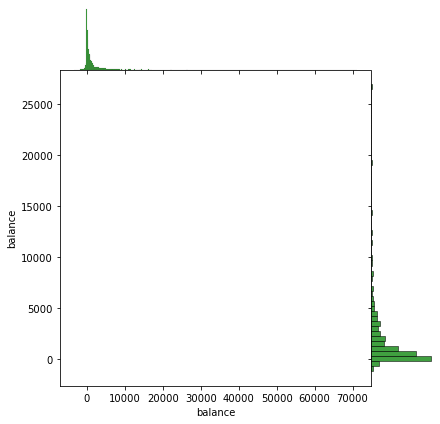

In [2]:
# Q3: Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in
# visualization.

dfno = df[df.y == 'no'].balance
dfyes = df[df.y == 'yes'].balance
notSubscribeMean = df[df.y == 'no'].balance.mean()
print('Not Subscribed Mean: ', notSubscribeMean)

subscribedMean = df[df.y == 'yes'].balance.mean()
print('Subscribed Mean: ', subscribedMean)
# print(dfno, dfyes)
sns.jointplot(dfno, dfyes, kind='hist', space=0, color='green')

<AxesSubplot:>

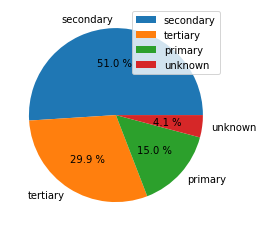

In [3]:
# Q4: Use a pie plot to find the distribution(frequency) of the education. 
# Make sure to add labels and show the percentage of each education distribution.

df.education.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

In [4]:
# Q5: Create a function that should be able to create a new feature(Variable) called season using the month column. 

def season(value):
    if value == 'mar' or value == 'apr':
        return 'Spring'
    elif value == 'may' or value == 'jun':
        return 'Summer'
    elif value == 'jul' or value == 'aug':
        return 'Monsoon'
    elif value == 'sep' or value == 'oct':
        return 'Autumn'
    elif value == 'nov' or value == 'dec':
        return 'Pre-winter'
    elif value == 'jan' or value == 'feb':
        return 'Winter'
    else:
        return 0

df['Season'] = df['month'].map(season)
#df.drop('Discounted_Price')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Monsoon
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Summer
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Monsoon
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter


<AxesSubplot:xlabel='Season', ylabel='count'>

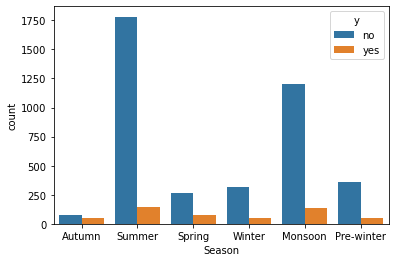

In [5]:
# Q6: Use the count plot with a variable that you created in the above question and also the 'Y' variable to find the class distribution.

sns.countplot(x=df.Season, hue=df.y, data=pd.melt(df), orient='h', dodge=True)

<AxesSubplot:xlabel='y', ylabel='pdays'>

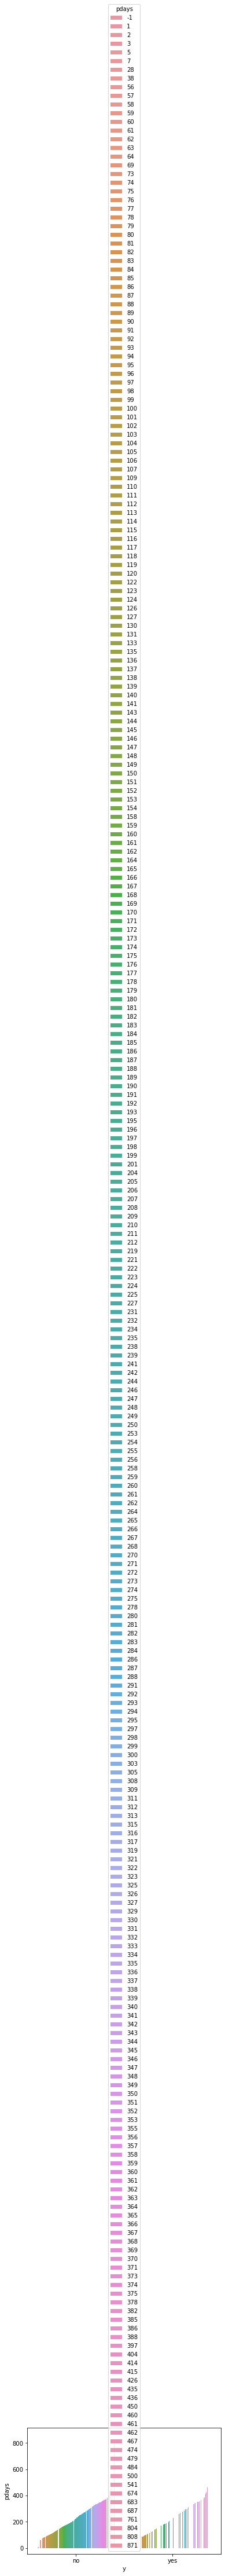

In [6]:
# Q7: Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.
sns.barplot(x=df.y, y=df.pdays, data=df, hue=df.pdays)

In [7]:
# Q8: Replace the -1 as nan values for the P-days store.
import numpy as np
df.pdays.replace(-1, np.nan, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Monsoon
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Summer
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Monsoon
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter


<AxesSubplot:xlabel='y', ylabel='pdays'>

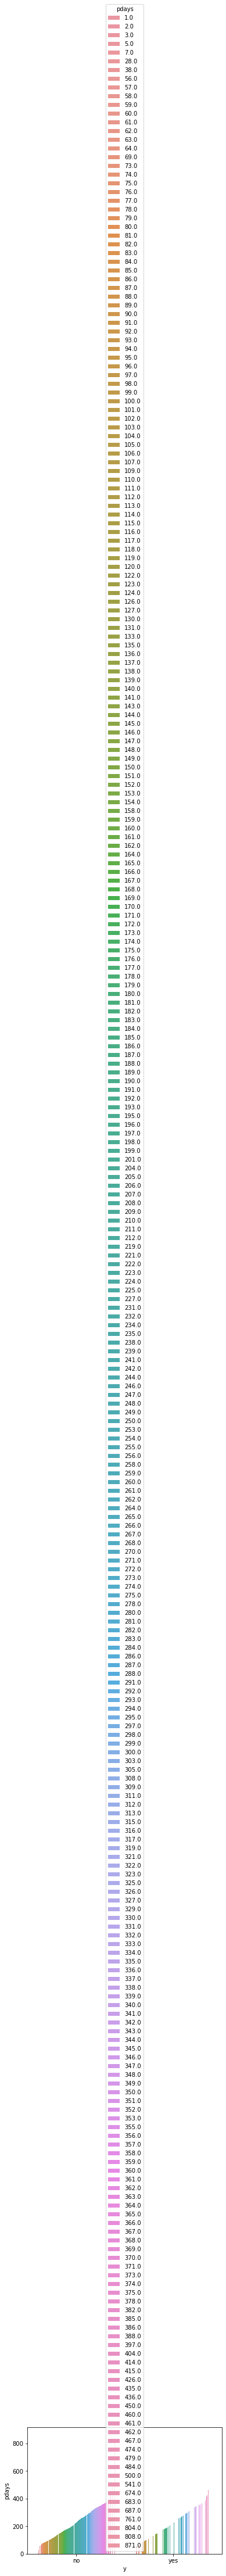

In [8]:
# 9. Once you are done with question number 8, do the same analysis as question number 7. 
# And observe the difference between question number 7 and question number 9.
sns.barplot(x=df.y, y=df.pdays, data=df, hue=df.pdays)

<AxesSubplot:xlabel='y', ylabel='balance'>

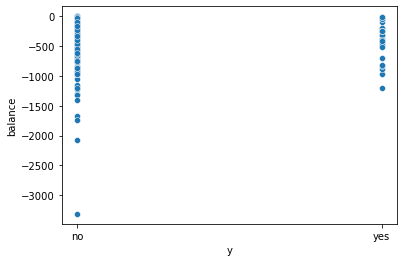

In [9]:
# Q 10: Does the customer take the term subscription who has less than 0 balance?
# Hint: Use any kind of plot which would you the related information to this question.

lessBal = df[df.balance < 0]
lessBal
sns.scatterplot(x=lessBal.y, y=lessBal.balance)

In [10]:
# 11. Use Pivot table to find the maximum balance for each type of job.
df.pivot_table(index='job', values='balance', aggfunc=max)

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


<AxesSubplot:xlabel='balance', ylabel='age'>

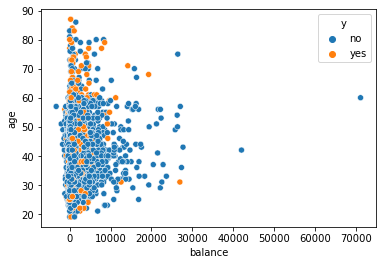

In [11]:
sns.scatterplot(x=df.balance, y=df.age, hue=df.y, markers=True)

<AxesSubplot:xlabel='y', ylabel='balance'>

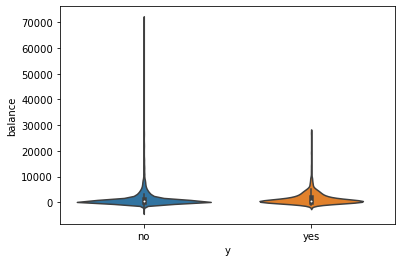

In [12]:
# Q13. Use the violin plot and also the box plot to find the distribution of the balance
# for each class of the Y column. And try to tell why we have a Violin plot and Box
# plot both rather than one.

sns.violinplot(x='y', y='balance', data=df)

<AxesSubplot:xlabel='y', ylabel='balance'>

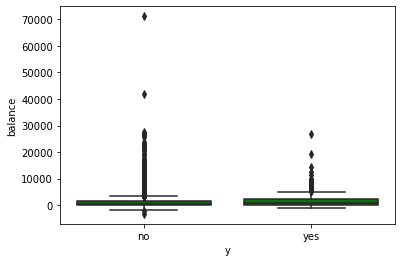

In [13]:
sns.boxplot(x='y', y='balance', data=df, color='green')

<AxesSubplot:>

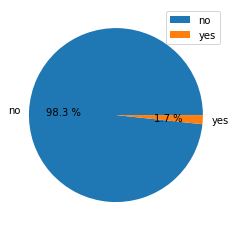

In [14]:
# Q14. Use a pie plot to know the Proportion(distribution) of the defaulters and nondefaulters.

dfNo = df[df['default'].str.lower() == 'no']
dfYes = df[df['default'].str.lower() == 'yes']
df.default.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

<AxesSubplot:xlabel='y', ylabel='pdays'>

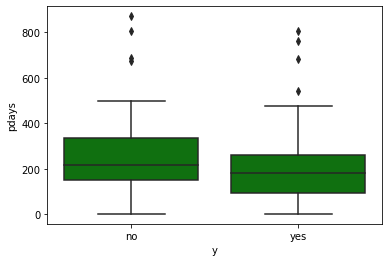

In [15]:
# Q15: Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.
sns.boxplot(x='y', y='pdays', data=df, color='green')